<a href="https://colab.research.google.com/github/kamikaze02/COSC-4P96-ASSIGNMENT-1/blob/main/COSC_4P96_ASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPLEMENT STAGE 1

In [ ]:
import tensorflow as tf
import numpy as np

#load data set
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

#Split to 80% training 10% testing 10% validating
#Randomize indices
#Split training
#Find Remaining indices
#Split the remaining indices into validating and testing data set
indices = np.random.permutation(len(x))

split_train = int(0.8 * len(x))
train_indices = indices[:split_train]
remaining_indices = indices[split_train:]

split_test = int(0.5 * len(remaining_indices))
test_indices = remaining_indices[:split_test]
val_indices = remaining_indices[split_test:]

trainData = x[train_indices]
trainLabels = y[train_indices]

testData = x[test_indices]
testLabels = y[test_indices]

validationData = x[val_indices]
validationLabels = y[val_indices]

# 20% LABEL 80% UNLABELED FROM TRAINING DATA SET

num_labeled = int(0.2 * len(trainData))

x_labeled = trainData[:num_labeled]
y_labeled = trainLabels[:num_labeled]

x_unlabeled = trainData[num_labeled:]


######################################
#DATA PREPARATION PART
######################################

global_mean = np.mean(trainData)
global_std = np.std(trainData)

def preprocess_minmax(image):
    image = tf.cast(image, tf.float32) / 255.0
    image = image[..., tf.newaxis]  # Add channel dimension
    return image
def preprocess_zscore(image):
    image = tf.cast(image, tf.float32)
    image = (image - global_mean) / global_std
    image = image[..., tf.newaxis]
    return image
####################################
#DATA ARGUMENTATION
###################################

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomTranslation(0.1, 0.1)

])

def augmentwithGaussian_noise(image):
    noise = tf.random.normal(
        shape=tf.shape(image),
        mean=0.0,
        stddev=0.05
    )
    image = image + noise
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image

def augmentwithRandomFlip(image):
    image = data_augmentation(image, training=True)
    return image

In [ ]:
import tensorflow as tf
import numpy as np

class FeedForwardNN(tf.keras.Model):
    def __init__(self):
        super(FeedForwardNN, self).__init__()

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')#Hidden layer 1
        self.dense2 = tf.keras.layers.Dense(128, activation='relu')# hidden layer 2
        self.output_layer = tf.keras.layers.Dense(10, activation='softmax') #output layer

    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)

model = FeedForwardNN()



In [ ]:
import tensorflow as tf
import numpy as np

######################################
# LOAD DATASET
######################################

fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

######################################
# SPLIT: 80% Train, 10% Test, 10% Val
######################################

indices = np.random.permutation(len(x))

split_train = int(0.8 * len(x))
train_indices = indices[:split_train]
remaining_indices = indices[split_train:]

split_test = int(0.5 * len(remaining_indices))
test_indices = remaining_indices[:split_test]
val_indices = remaining_indices[split_test:]

trainData = x[train_indices]
trainLabels = y[train_indices]

testData = x[test_indices]
testLabels = y[test_indices]

validationData = x[val_indices]
validationLabels = y[val_indices]

######################################
# 20% LABELED
######################################

num_labeled = int(0.2 * len(trainData))

x_labeled = trainData[:num_labeled]
y_labeled = trainLabels[:num_labeled]

######################################
# PREPROCESSING
######################################

global_mean = np.mean(trainData)
global_std = np.std(trainData)

def preprocess_minmax(image):
    image = tf.cast(image, tf.float32) / 255.0
    image = image[..., tf.newaxis]  # Add channel dimension
    return image
def preprocess_zscore(image):
    image = tf.cast(image, tf.float32)
    image = (image - global_mean) / global_std
    image = image[..., tf.newaxis]
    return image

######################################
# AUGMENTATION
######################################

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomTranslation(0.1, 0.1)

])

def augmentwithGaussian_noise(image):
    noise = tf.random.normal(
        shape=tf.shape(image),
        mean=0.0,
        stddev=0.05
    )
    image = image + noise
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image

def augmentwithRandomFlip(image):
    image = data_augmentation(image, training=True)
    return image

######################################
# DATASETS
######################################

batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
train_dataset = train_dataset.map(
    lambda x, y: (
        augment(preprocess_minmax(x)),
        tf.cast(y, tf.int64)
    )
).shuffle(10000).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices(
    (validationData, validationLabels)
).map(
    lambda x, y: (
        preprocess_minmax(x),
        tf.cast(y, tf.int64)
    )
).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (testData, testLabels)
).map(
    lambda x, y: (
        preprocess_minmax(x),
        tf.cast(y, tf.int64)
    )
).batch(batch_size)

######################################
# MODEL
######################################

class FeedForwardNN(tf.keras.Model):
    def __init__(self):
        super(FeedForwardNN, self).__init__()

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(128, activation='relu')
        self.output_layer = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)

model = FeedForwardNN()

######################################
# LOSS + OPTIMIZER (SGD + MOMENTUM)
######################################

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

learning_rate = 0.01
momentum = 0.9

optimizer = tf.keras.optimizers.SGD(
    learning_rate=learning_rate,
    momentum=momentum
)

######################################
# TRAINING LOOP
######################################

epochs = 10

for epoch in range(epochs):

    total_loss = 0
    total_correct = 0
    total_samples = 0

    for images, labels in train_dataset:

        with tf.GradientTape() as tape:
            predictions = model(images, training=True)
            loss = loss_fn(labels, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        total_loss += loss.numpy()

        preds = tf.argmax(predictions, axis=1)
        total_correct += tf.reduce_sum(
            tf.cast(preds == labels, tf.int32)
        ).numpy()

        total_samples += labels.shape[0]

    print(f"\nEpoch {epoch+1}")
    print("Training Loss:", total_loss / len(train_dataset))
    print("Training Accuracy:", total_correct / total_samples)

######################################
# TEST EVALUATION
######################################

test_correct = 0
test_total = 0

for images, labels in test_dataset:
    predictions = model(images, training=False)
    preds = tf.argmax(predictions, axis=1)
    test_correct += tf.reduce_sum(
        tf.cast(preds == labels, tf.int32)
    ).numpy()
    test_total += labels.shape[0]

print("\nFinal Test Accuracy:", test_correct / test_total)


Epoch 1
Training Loss: 1.1356169
Training Accuracy: 0.59875

Epoch 2
Training Loss: 0.7093813
Training Accuracy: 0.7464583333333333

Epoch 3
Training Loss: 0.64103734
Training Accuracy: 0.7688541666666666

Epoch 4
Training Loss: 0.5878731
Training Accuracy: 0.7855208333333333

Epoch 5
Training Loss: 0.55598986
Training Accuracy: 0.7991666666666667

Epoch 6
Training Loss: 0.52289635
Training Accuracy: 0.8126041666666667

Epoch 7
Training Loss: 0.5063178
Training Accuracy: 0.8178125

Epoch 8
Training Loss: 0.4713973
Training Accuracy: 0.8339583333333334

Epoch 9
Training Loss: 0.46175838
Training Accuracy: 0.8335416666666666

Epoch 10
Training Loss: 0.44825566
Training Accuracy: 0.8379166666666666

Final Test Accuracy: 0.787


# IMPLEMENT STAGE 2B

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

######################################
# LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

indices = np.random.permutation(len(x))
split_train = int(0.8 * len(x))
train_indices = indices[:split_train]
remaining_indices = indices[split_train:]
split_test = int(0.5 * len(remaining_indices))
test_indices = remaining_indices[:split_test]
val_indices = remaining_indices[split_test:]

trainData, trainLabels = x[train_indices], y[train_indices]
testData, testLabels = x[test_indices], y[test_indices]
validationData, validationLabels = x[val_indices], y[val_indices]

# 20% labeled
num_labeled = int(0.2 * len(trainData))
x_labeled, y_labeled = trainData[:num_labeled], trainLabels[:num_labeled]

######################################
# DATA PREPROCESSING
######################################
global_mean = np.mean(trainData)
global_std = np.std(trainData)

def preprocess_minmax(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

def preprocess_zscore(image):
    image = tf.cast(image, tf.float32)
    image = (image - global_mean) / global_std
    return image[..., tf.newaxis]

######################################
# DATA AUGMENTATION
######################################
flip_augment = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal")])

def augment_flip(image):
    return flip_augment(image, training=True)

def augment_noise(image):
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05)
    image = tf.cast(image, tf.float32)/255.0 + noise
    return tf.clip_by_value(image, 0.0, 1.0)

######################################
# MODEL DEFINITION
######################################
class FeedForwardNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(256, activation='relu')
        self.d2 = tf.keras.layers.Dense(128, activation='relu')
        self.out = tf.keras.layers.Dense(10, activation='softmax')
    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        return self.out(x)

######################################
# EXPERIMENT PARAMETERS
######################################
preprocessing_methods = {
    "MinMax": preprocess_minmax,
    "ZScore": preprocess_zscore
}

augmentation_methods = {
    "RandomFlip": augment_flip,
    "GaussianNoise": augment_noise
}

learning_rates = [0.001, 0.01, 0.1]
momentums = [0.5, 0.9]

batch_size = 64
epochs = 5  # keep small for speed
results = []

######################################
# EXPERIMENT LOOP
######################################
for prep_name, prep_fn in preprocessing_methods.items():
    for aug_name, aug_fn in augmentation_methods.items():

        # Create dataset
        train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
        train_dataset = train_dataset.map(lambda x,y: (aug_fn(prep_fn(x)), tf.cast(y, tf.int64))).shuffle(10000).batch(batch_size)

        val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
        val_dataset = val_dataset.map(lambda x,y: (prep_fn(x), tf.cast(y, tf.int64))).batch(batch_size)

        test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
        test_dataset = test_dataset.map(lambda x,y: (prep_fn(x), tf.cast(y, tf.int64))).batch(batch_size)

        for lr in learning_rates:
            for mom in momentums:

                model = FeedForwardNN()
                optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=mom)
                loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

                # Training
                for epoch in range(epochs):
                    for images, labels in train_dataset:
                        with tf.GradientTape() as tape:
                            preds = model(images, training=True)
                            loss = loss_fn(labels, preds)
                        grads = tape.gradient(loss, model.trainable_variables)
                        optimizer.apply_gradients(zip(grads, model.trainable_variables))

                # Testing
                correct = 0
                total = 0
                for images, labels in test_dataset:
                    preds = model(images, training=False)
                    predictions = tf.argmax(preds, axis=1)
                    correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
                    total += labels.shape[0]

                acc = correct / total

                results.append({
                    "Preprocessing": prep_name,
                    "Augmentation": aug_name,
                    "LearningRate": lr,
                    "Momentum": mom,
                    "TestAccuracy": acc
                })
                print(f"{prep_name}-{aug_name}-lr{lr}-mom{mom}: Test Acc={acc:.4f}")

######################################
# STORE RESULTS
######################################
df = pd.DataFrame(results)
df.to_csv("experiment_results.csv", index=False)
print("\n=== RESULTS TABLE ===")
print(df)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MinMax-RandomFlip-lr0.001-mom0.5: Test Acc=0.6382
MinMax-RandomFlip-lr0.001-mom0.9: Test Acc=0.7525
MinMax-RandomFlip-lr0.01-mom0.5: Test Acc=0.8070
MinMax-RandomFlip-lr0.01-mom0.9: Test Acc=0.8235
MinMax-RandomFlip-lr0.1-mom0.5: Test Acc=0.8402
MinMax-RandomFlip-lr0.1-mom0.9: Test Acc=0.7987
MinMax-GaussianNoise-lr0.001-mom0.5: Test Acc=0.1290
MinMax-GaussianNoise-lr0.001-mom0.9: Test Acc=0.1078
MinMax-GaussianNoise-lr0.01-mom0.5: Test Acc=0.0430
MinMax-GaussianNoise-lr0.01-mom0.9: Test Acc=0.2072
MinMax-GaussianNoise-lr0.1-mom0.5: Test Acc=0.1398
MinMax-GaussianNoise-lr0.1-mom0.9: Test Acc=0.1173
ZScore-RandomFlip-lr0.001-mom0.5: Test Acc=0.7492
ZScore-RandomFlip-lr0.001-mom0.9: Test Acc=0.8120
ZScore-RandomFlip-lr0.01-mom0.5: Test Acc=0.8182
ZScore-RandomFlip-lr0.01-mom0.9: Test Acc=0.8227
ZScore-R

# IMPLEMENT WEIGHT INITIALIZATION

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

######################################
# LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

indices = np.random.permutation(len(x))
split_train = int(0.8 * len(x))
train_indices = indices[:split_train]
remaining_indices = indices[split_train:]
split_test = int(0.5 * len(remaining_indices))
test_indices = remaining_indices[:split_test]
val_indices = remaining_indices[split_test:]

trainData, trainLabels = x[train_indices], y[train_indices]
testData, testLabels = x[test_indices], y[test_indices]
validationData, validationLabels = x[val_indices], y[val_indices]

# 20% labeled
num_labeled = int(0.2 * len(trainData))
x_labeled, y_labeled = trainData[:num_labeled], trainLabels[:num_labeled]

######################################
# DATA PREPROCESSING
######################################
global_mean = np.mean(trainData)
global_std = np.std(trainData)

def preprocess_minmax(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

def preprocess_zscore(image):
    image = tf.cast(image, tf.float32)
    image = (image - global_mean) / global_std
    return image[..., tf.newaxis]

######################################
# DATA AUGMENTATION
######################################
flip_augment = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal")])

def augment_flip(image):
    return flip_augment(image, training=True)

def augment_noise(image):
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05)
    image = tf.cast(image, tf.float32)/255.0 + noise
    return tf.clip_by_value(image, 0.0, 1.0)

######################################
# WEIGHT INITIALIZERS
######################################
initializers = {
    "RandomUniform": tf.keras.initializers.RandomUniform(minval=-1/784, maxval=1/784),
    "RandomNormal": tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01),
    "HeNormal": tf.keras.initializers.HeNormal()  # good for ReLU
}

######################################
# MODEL DEFINITION
######################################
def create_model(initializer):
    class FeedForwardNN(tf.keras.Model):
        def __init__(self):
            super().__init__()
            self.flatten = tf.keras.layers.Flatten()
            self.d1 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
            self.d2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer)
            self.out = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

        def call(self, x, training=False):
            x = self.flatten(x)
            x = self.d1(x)
            x = self.d2(x)
            return self.out(x)

    return FeedForwardNN()

######################################
# EXPERIMENT PARAMETERS
######################################
preprocessing_methods = {
    "MinMax": preprocess_minmax,
    "ZScore": preprocess_zscore
}

augmentation_methods = {
    "RandomFlip": augment_flip,
    "GaussianNoise": augment_noise
}

learning_rates = [0.001, 0.01, 0.1]
momentums = [0.5, 0.9]

batch_size = 64
epochs = 5  # keep small for speed
results = []

######################################
# EXPERIMENT LOOP
######################################
for prep_name, prep_fn in preprocessing_methods.items():
    for aug_name, aug_fn in augmentation_methods.items():
        # Create datasets
        train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
        train_dataset = train_dataset.map(lambda x,y: (aug_fn(prep_fn(x)), tf.cast(y, tf.int64))).shuffle(10000).batch(batch_size)

        val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
        val_dataset = val_dataset.map(lambda x,y: (prep_fn(x), tf.cast(y, tf.int64))).batch(batch_size)

        test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
        test_dataset = test_dataset.map(lambda x,y: (prep_fn(x), tf.cast(y, tf.int64))).batch(batch_size)

        for init_name, initializer in initializers.items():
            for lr in learning_rates:
                for mom in momentums:
                    model = create_model(initializer)
                    optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=mom)
                    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

                    # Training
                    for epoch in range(epochs):
                        for images, labels in train_dataset:
                            with tf.GradientTape() as tape:
                                preds = model(images, training=True)
                                loss = loss_fn(labels, preds)
                            grads = tape.gradient(loss, model.trainable_variables)
                            optimizer.apply_gradients(zip(grads, model.trainable_variables))

                    # Testing
                    correct = 0
                    total = 0
                    for images, labels in test_dataset:
                        preds = model(images, training=False)
                        predictions = tf.argmax(preds, axis=1)
                        correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
                        total += labels.shape[0]

                    acc = correct / total

                    results.append({
                        "Preprocessing": prep_name,
                        "Augmentation": aug_name,
                        "Initializer": init_name,
                        "LearningRate": lr,
                        "Momentum": mom,
                        "TestAccuracy": acc
                    })
                    print(f"{prep_name}-{aug_name}-{init_name}-lr{lr}-mom{mom}: Test Acc={acc:.4f}")

######################################
# STORE RESULTS
######################################
df = pd.DataFrame(results)
df.to_csv("experiment_results_with_init.csv", index=False)
print("\n=== RESULTS TABLE ===")
print(df)


MinMax-RandomFlip-RandomUniform-lr0.001-mom0.5: Test Acc=0.1028
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.9: Test Acc=0.1028
MinMax-RandomFlip-RandomUniform-lr0.01-mom0.5: Test Acc=0.1028
MinMax-RandomFlip-RandomUniform-lr0.01-mom0.9: Test Acc=0.1028
MinMax-RandomFlip-RandomUniform-lr0.1-mom0.5: Test Acc=0.2377
MinMax-RandomFlip-RandomUniform-lr0.1-mom0.9: Test Acc=0.7838
MinMax-RandomFlip-RandomNormal-lr0.001-mom0.5: Test Acc=0.1030
MinMax-RandomFlip-RandomNormal-lr0.001-mom0.9: Test Acc=0.1572
MinMax-RandomFlip-RandomNormal-lr0.01-mom0.5: Test Acc=0.3302
MinMax-RandomFlip-RandomNormal-lr0.01-mom0.9: Test Acc=0.7602
MinMax-RandomFlip-RandomNormal-lr0.1-mom0.5: Test Acc=0.7843
MinMax-RandomFlip-RandomNormal-lr0.1-mom0.9: Test Acc=0.8233
MinMax-RandomFlip-HeNormal-lr0.001-mom0.5: Test Acc=0.6585
MinMax-RandomFlip-HeNormal-lr0.001-mom0.9: Test Acc=0.7745
MinMax-RandomFlip-HeNormal-lr0.01-mom0.5: Test Acc=0.8032
MinMax-RandomFlip-HeNormal-lr0.01-mom0.9: Test Acc=0.8417
MinMax-RandomFli

# Implement Overfitting Detection

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from collections import deque

######################################
# LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

indices = np.random.permutation(len(x))
split_train = int(0.8 * len(x))
train_indices = indices[:split_train]
remaining_indices = indices[split_train:]
split_test = int(0.5 * len(remaining_indices))
test_indices = remaining_indices[:split_test]
val_indices = remaining_indices[split_test:]

trainData, trainLabels = x[train_indices], y[train_indices]
testData, testLabels = x[test_indices], y[test_indices]
validationData, validationLabels = x[val_indices], y[val_indices]

# 20% labeled
num_labeled = int(0.2 * len(trainData))
x_labeled, y_labeled = trainData[:num_labeled], trainLabels[:num_labeled]

######################################
# DATA PREPROCESSING
######################################
global_mean = np.mean(trainData)
global_std = np.std(trainData)

def preprocess_minmax(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

def preprocess_zscore(image):
    image = tf.cast(image, tf.float32)
    image = (image - global_mean) / global_std
    return image[..., tf.newaxis]

######################################
# DATA AUGMENTATION
######################################
flip_augment = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal")])

def augment_flip(image):
    return flip_augment(image, training=True)

def augment_noise(image):
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05)
    image = tf.cast(image, tf.float32)/255.0 + noise
    return tf.clip_by_value(image, 0.0, 1.0)

######################################
# WEIGHT INITIALIZERS
######################################
initializers = {
    "RandomUniform": tf.keras.initializers.RandomUniform(minval=-1/784, maxval=1/784),
    "RandomNormal": tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01),
    "HeNormal": tf.keras.initializers.HeNormal()  # good for ReLU
}

######################################
# MODEL DEFINITION
######################################
def create_model(initializer):
    class FeedForwardNN(tf.keras.Model):
        def __init__(self):
            super().__init__()
            self.flatten = tf.keras.layers.Flatten()
            self.d1 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
            self.d2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer)
            self.out = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

        def call(self, x, training=False):
            x = self.flatten(x)
            x = self.d1(x)
            x = self.d2(x)
            return self.out(x)

    return FeedForwardNN()

######################################
# EXPERIMENT PARAMETERS
######################################
preprocessing_methods = {
    "MinMax": preprocess_minmax,
    "ZScore": preprocess_zscore
}

augmentation_methods = {
    "RandomFlip": augment_flip,
    "GaussianNoise": augment_noise
}

learning_rates = [0.001, 0.01, 0.1]
momentums = [0.5, 0.9]

batch_size = 64
epochs = 10  # high epochs to allow early stopping
moving_window = 5  # number of recent validation errors to compute EV and σEV
results = []

######################################
# EXPERIMENT LOOP WITH EARLY STOPPING
######################################
for prep_name, prep_fn in preprocessing_methods.items():
    for aug_name, aug_fn in augmentation_methods.items():
        # Create datasets
        train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
        train_dataset = train_dataset.map(lambda x,y: (aug_fn(prep_fn(x)), tf.cast(y, tf.int64))).shuffle(10000).batch(batch_size)

        val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
        val_dataset = val_dataset.map(lambda x,y: (prep_fn(x), tf.cast(y, tf.int64))).batch(batch_size)

        test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
        test_dataset = test_dataset.map(lambda x,y: (prep_fn(x), tf.cast(y, tf.int64))).batch(batch_size)

        for init_name, initializer in initializers.items():
            for lr in learning_rates:
                for mom in momentums:
                    model = create_model(initializer)
                    optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=mom)
                    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

                    # Early stopping setup
                    val_errors = deque(maxlen=moving_window)

                    # Training with early stopping
                    for epoch in range(epochs):
                        for images, labels in train_dataset:
                            with tf.GradientTape() as tape:
                                preds = model(images, training=True)
                                loss = loss_fn(labels, preds)
                            grads = tape.gradient(loss, model.trainable_variables)
                            optimizer.apply_gradients(zip(grads, model.trainable_variables))

                        # Compute validation error
                        val_loss_total = 0
                        val_samples = 0
                        for images, labels in val_dataset:
                            preds = model(images, training=False)
                            loss = loss_fn(labels, preds)
                            val_loss_total += loss.numpy() * images.shape[0]
                            val_samples += images.shape[0]
                        val_error = val_loss_total / val_samples
                        val_errors.append(val_error)

                        # Check early stopping
                        if len(val_errors) == moving_window:
                            EV = np.mean(val_errors)
                            sigma_EV = np.std(val_errors)
                            if val_error > EV + sigma_EV:
                                print(f"Early stopping at epoch {epoch+1} | Val Error: {val_error:.4f} > EV+σEV: {EV+sigma_EV:.4f}")
                                break

                        print(f"{prep_name}-{aug_name}-{init_name}-lr{lr}-mom{mom} | Epoch {epoch+1} | Val Error: {val_error:.4f}")

                    # Testing
                    correct = 0
                    total = 0
                    for images, labels in test_dataset:
                        preds = model(images, training=False)
                        predictions = tf.argmax(preds, axis=1)
                        correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
                        total += labels.shape[0]

                    acc = correct / total

                    results.append({
                        "Preprocessing": prep_name,
                        "Augmentation": aug_name,
                        "Initializer": init_name,
                        "LearningRate": lr,
                        "Momentum": mom,
                        "TestAccuracy": acc
                    })
                    print(f"{prep_name}-{aug_name}-{init_name}-lr{lr}-mom{mom}: Test Acc={acc:.4f}")

######################################
# STORE RESULTS
######################################
df = pd.DataFrame(results)
df.to_csv("experiment_results_with_early_stopping.csv", index=False)
print("\n=== RESULTS TABLE ===")
print(df)


MinMax-RandomFlip-RandomUniform-lr0.001-mom0.5 | Epoch 1 | Val Error: 2.3026
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.5 | Epoch 2 | Val Error: 2.3027
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.5 | Epoch 3 | Val Error: 2.3027
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.5 | Epoch 4 | Val Error: 2.3027
Early stopping at epoch 5 | Val Error: 2.3028 > EV+σEV: 2.3027
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.5: Test Acc=0.0995
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.9 | Epoch 1 | Val Error: 2.3028
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.9 | Epoch 2 | Val Error: 2.3030
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.9 | Epoch 3 | Val Error: 2.3031
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.9 | Epoch 4 | Val Error: 2.3033
Early stopping at epoch 5 | Val Error: 2.3035 > EV+σEV: 2.3034
MinMax-RandomFlip-RandomUniform-lr0.001-mom0.9: Test Acc=0.0995
MinMax-RandomFlip-RandomUniform-lr0.01-mom0.5 | Epoch 1 | Val Error: 2.3030
MinMax-RandomFlip-RandomUniform-lr0.01-mom0.5 | Epoch 

KeyboardInterrupt: 

# IMPLEMENT STAGE 2 PART E AND F

In [ ]:

import tensorflow as tf
import numpy as np
import pandas as pd
from collections import deque
import time

######################################
# SEEDS FOR PART (f)
######################################
seeds = [1, 123, 12345]

######################################
# LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

######################################
# FIXED BASELINE CONFIGURATION
######################################
initializer = tf.keras.initializers.HeNormal()
learning_rate = 0.1
momentum = 0.9
batch_size = 64
epochs = 50
moving_window = 5

######################################
# PREPROCESSING (MinMax for baseline)
######################################
def preprocess(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

######################################
# MODEL DEFINITION
######################################
def create_model():
    class FeedForwardNN(tf.keras.Model):
        def __init__(self):
            super().__init__()
            self.flatten = tf.keras.layers.Flatten()
            self.d1 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
            self.d2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer)
            self.out = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

        def call(self, x):
            x = self.flatten(x)
            x = self.d1(x)
            x = self.d2(x)
            return self.out(x)

    return FeedForwardNN()

######################################
# RESULTS STORAGE
######################################
baseline_results = []

######################################
# RUN BASELINE FOR EACH SEED
######################################
for seed in seeds:
    print(f"\n===== RUNNING SEED {seed} =====")

    tf.random.set_seed(seed)
    np.random.seed(seed)

    # Shuffle data
    indices = np.random.permutation(len(x))
    split_train = int(0.8 * len(x))
    train_indices = indices[:split_train]
    remaining_indices = indices[split_train:]

    split_test = int(0.5 * len(remaining_indices))
    test_indices = remaining_indices[:split_test]
    val_indices = remaining_indices[split_test:]

    trainData, trainLabels = x[train_indices], y[train_indices]
    testData, testLabels = x[test_indices], y[test_indices]
    validationData, validationLabels = x[val_indices], y[val_indices]

    # 🔴 PART (e): Use ONLY 10% labeled
    num_labeled = int(0.1 * len(trainData))
    x_labeled = trainData[:num_labeled]
    y_labeled = trainLabels[:num_labeled]

    # Datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
    train_dataset = train_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).shuffle(10000).batch(batch_size)

    val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
    val_dataset = val_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

    test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
    test_dataset = test_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

    model = create_model()
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

    val_errors = deque(maxlen=moving_window)

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    start_time = time.time()

    ######################################
    # TRAINING LOOP WITH EARLY STOPPING
    ######################################
    for epoch in range(epochs):

        # Training
        train_correct = 0
        train_total = 0
        train_loss_total = 0

        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                preds = model(images)
                loss = loss_fn(labels, preds)
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            train_loss_total += loss.numpy() * images.shape[0]
            predictions = tf.argmax(preds, axis=1)
            train_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            train_total += labels.shape[0]

        train_loss = train_loss_total / train_total
        train_acc = train_correct / train_total

        # Validation
        val_correct = 0
        val_total = 0
        val_loss_total = 0

        for images, labels in val_dataset:
            preds = model(images)
            loss = loss_fn(labels, preds)
            val_loss_total += loss.numpy() * images.shape[0]
            predictions = tf.argmax(preds, axis=1)
            val_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            val_total += labels.shape[0]

        val_loss = val_loss_total / val_total
        val_acc = val_correct / val_total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        val_errors.append(val_loss)

        print(f"Epoch {epoch+1} | Train Loss {train_loss:.4f} | Val Loss {val_loss:.4f}")

        # Early stopping (Part d reused here)
        if len(val_errors) == moving_window:
            EV = np.mean(val_errors)
            sigma_EV = np.std(val_errors)
            if val_loss > EV + sigma_EV:
                print(f"Early stopping at epoch {epoch+1}")
                break

    epochs_to_convergence = epoch + 1
    training_time = time.time() - start_time

    ######################################
    # TEST EVALUATION
    ######################################
    correct = 0
    total = 0

    for images, labels in test_dataset:
        preds = model(images)
        predictions = tf.argmax(preds, axis=1)
        correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
        total += labels.shape[0]

    test_acc = correct / total

    print(f"Final Test Accuracy (Seed {seed}): {test_acc:.4f}")
    print(f"Epochs to Convergence: {epochs_to_convergence}")

    baseline_results.append({
        "Seed": seed,
        "TestAccuracy": test_acc,
        "EpochsToConvergence": epochs_to_convergence,
        "TrainingTimeSeconds": training_time
    })

######################################
# SAVE RESULTS
######################################
df = pd.DataFrame(baseline_results)
df.to_csv("baseline_results.csv", index=False)

print("\n=== BASELINE RESULTS ===")
print(df)
print("\nMean Accuracy:", df["TestAccuracy"].mean())
print("Std Accuracy:", df["TestAccuracy"].std())



===== RUNNING SEED 1 =====
Epoch 1 | Train Loss 1.0646 | Val Loss 0.7089
Epoch 2 | Train Loss 0.6358 | Val Loss 0.6547
Epoch 3 | Train Loss 0.5569 | Val Loss 0.5251
Epoch 4 | Train Loss 0.5024 | Val Loss 0.5047
Epoch 5 | Train Loss 0.4615 | Val Loss 0.5068
Epoch 6 | Train Loss 0.4414 | Val Loss 0.5193
Epoch 7 | Train Loss 0.4325 | Val Loss 0.4819
Epoch 8 | Train Loss 0.3937 | Val Loss 0.4704
Epoch 9 | Train Loss 0.3998 | Val Loss 0.4674
Epoch 10 | Train Loss 0.3691 | Val Loss 0.4734
Epoch 11 | Train Loss 0.3451 | Val Loss 0.4475
Epoch 12 | Train Loss 0.3308 | Val Loss 0.4505
Epoch 13 | Train Loss 0.3069 | Val Loss 0.4742
Early stopping at epoch 13
Final Test Accuracy (Seed 1): 0.8407
Epochs to Convergence: 13

===== RUNNING SEED 123 =====
Epoch 1 | Train Loss 1.0680 | Val Loss 0.6812
Epoch 2 | Train Loss 0.6222 | Val Loss 0.5619
Epoch 3 | Train Loss 0.5551 | Val Loss 0.5663
Epoch 4 | Train Loss 0.4886 | Val Loss 0.5087
Epoch 5 | Train Loss 0.4550 | Val Loss 0.5195
Epoch 6 | Train Loss

# Implement Dropout regularization

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from collections import deque
import time

######################################
# SEEDS FOR EXPERIMENTS
######################################
seeds = [1, 123, 12345]

######################################
# LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

######################################
# BASELINE CONFIG
######################################
initializer = tf.keras.initializers.HeNormal()
learning_rate = 0.1
momentum = 0.9
batch_size = 64
epochs = 50
moving_window = 5
dropout_rates = [0.1, 0.25, 0.5]  # dropout experiments

######################################
# PREPROCESSING
######################################
def preprocess(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

######################################
# MODEL DEFINITION WITH DROPOUT
######################################
def create_model(dropout_rate):
    class DropoutNN(tf.keras.Model):
        def __init__(self):
            super().__init__()
            self.flatten = tf.keras.layers.Flatten()
            self.d1 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
            self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
            self.d2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer)
            self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
            self.out = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

        def call(self, x, training=False):
            x = self.flatten(x)
            x = self.d1(x)
            x = self.dropout1(x, training=training)
            x = self.d2(x)
            x = self.dropout2(x, training=training)
            return self.out(x)

    return DropoutNN()

######################################
# RESULTS STORAGE
######################################
dropout_results = []

######################################
# RUN EXPERIMENTS
######################################
for dropout_rate in dropout_rates:
    for seed in seeds:
        print(f"\n===== DROPOUT {dropout_rate} | SEED {seed} =====")

        tf.random.set_seed(seed)
        np.random.seed(seed)

        # Shuffle data
        indices = np.random.permutation(len(x))
        split_train = int(0.8 * len(x))
        train_indices = indices[:split_train]
        remaining_indices = indices[split_train:]
        split_test = int(0.5 * len(remaining_indices))
        test_indices = remaining_indices[:split_test]
        val_indices = remaining_indices[split_test:]

        trainData, trainLabels = x[train_indices], y[train_indices]
        testData, testLabels = x[test_indices], y[test_indices]
        validationData, validationLabels = x[val_indices], y[val_indices]

        # Use only 10% labeled
        num_labeled = int(0.1 * len(trainData))
        x_labeled = trainData[:num_labeled]
        y_labeled = trainLabels[:num_labeled]

        # Datasets
        train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
        train_dataset = train_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).shuffle(10000).batch(batch_size)

        val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
        val_dataset = val_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

        test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
        test_dataset = test_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

        # Model, optimizer, loss
        model = create_model(dropout_rate)
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
        val_errors = deque(maxlen=moving_window)

        start_time = time.time()

        # Training loop with early stopping
        for epoch in range(epochs):
            # Training
            train_loss_total, train_correct, train_total = 0, 0, 0
            for images, labels in train_dataset:
                with tf.GradientTape() as tape:
                    preds = model(images, training=True)
                    loss = loss_fn(labels, preds)
                grads = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(grads, model.trainable_variables))

                train_loss_total += loss.numpy() * images.shape[0]
                train_correct += tf.reduce_sum(tf.cast(tf.argmax(preds, axis=1) == labels, tf.int32)).numpy()
                train_total += labels.shape[0]

            train_loss = train_loss_total / train_total
            train_acc = train_correct / train_total

            # Validation
            val_loss_total, val_correct, val_total = 0, 0, 0
            for images, labels in val_dataset:
                preds = model(images, training=False)
                loss = loss_fn(labels, preds)
                val_loss_total += loss.numpy() * images.shape[0]
                val_correct += tf.reduce_sum(tf.cast(tf.argmax(preds, axis=1) == labels, tf.int32)).numpy()
                val_total += labels.shape[0]

            val_loss = val_loss_total / val_total
            val_acc = val_correct / val_total
            val_errors.append(val_loss)

            print(f"Epoch {epoch+1} | Train Loss {train_loss:.4f} | Val Loss {val_loss:.4f}")

            # Early stopping
            if len(val_errors) == moving_window:
                EV = np.mean(val_errors)
                sigma_EV = np.std(val_errors)
                if val_loss > EV + sigma_EV:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

        training_time = time.time() - start_time
        epochs_to_convergence = epoch + 1

        # Test evaluation
        correct, total = 0, 0
        for images, labels in test_dataset:
            preds = model(images, training=False)
            correct += tf.reduce_sum(tf.cast(tf.argmax(preds, axis=1) == labels, tf.int32)).numpy()
            total += labels.shape[0]

        test_acc = correct / total

        print(f"Test Accuracy: {test_acc:.4f} | Epochs: {epochs_to_convergence}")

        dropout_results.append({
            "DropoutRate": dropout_rate,
            "Seed": seed,
            "TestAccuracy": test_acc,
            "EpochsToConvergence": epochs_to_convergence,
            "TrainingTimeSeconds": training_time
        })

######################################
# SAVE RESULTS
######################################
df = pd.DataFrame(dropout_results)
df.to_csv("dropout_results.csv", index=False)

print("\n=== DROPOUT RESULTS ===")
print(df)




===== DROPOUT 0.1 | SEED 1 =====
Epoch 1 | Train Loss 1.0111 | Val Loss 0.6740
Epoch 2 | Train Loss 0.6886 | Val Loss 0.6544
Epoch 3 | Train Loss 0.6599 | Val Loss 0.6009
Epoch 4 | Train Loss 0.6064 | Val Loss 0.5881
Epoch 5 | Train Loss 0.6093 | Val Loss 0.5731
Epoch 6 | Train Loss 0.5977 | Val Loss 0.5957
Epoch 7 | Train Loss 0.5727 | Val Loss 0.6241
Early stopping at epoch 7
Test Accuracy: 0.7687 | Epochs: 7

===== DROPOUT 0.1 | SEED 123 =====
Epoch 1 | Train Loss 0.9953 | Val Loss 0.7609
Epoch 2 | Train Loss 0.6907 | Val Loss 0.6036
Epoch 3 | Train Loss 0.6169 | Val Loss 0.5910
Epoch 4 | Train Loss 0.6026 | Val Loss 0.5875
Epoch 5 | Train Loss 0.5475 | Val Loss 0.5991
Epoch 6 | Train Loss 0.5423 | Val Loss 0.5758
Epoch 7 | Train Loss 0.5284 | Val Loss 0.5313
Epoch 8 | Train Loss 0.5481 | Val Loss 0.5162
Epoch 9 | Train Loss 0.4981 | Val Loss 0.5806
Epoch 10 | Train Loss 0.5007 | Val Loss 0.5646
Epoch 11 | Train Loss 0.4986 | Val Loss 0.5363
Epoch 12 | Train Loss 0.5008 | Val Loss 

# Implement Network prunning

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from collections import deque
import time

######################################
# SEEDS AND PRUNING RATES
######################################
seeds = [1, 123, 12345]
pruning_rates = [0.1, 0.25, 0.5]  # prune 10%, 25%, 50% of weights

######################################
# LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

######################################
# BASELINE CONFIG
######################################
initializer = tf.keras.initializers.HeNormal()
learning_rate = 0.1
momentum = 0.9
batch_size = 64
epochs = 50
moving_window = 5

######################################
# PREPROCESSING
######################################
def preprocess(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

######################################
# MODEL DEFINITION (LARGER NETWORK)
######################################
def create_large_model():
    class LargeNN(tf.keras.Model):
        def __init__(self):
            super().__init__()
            self.flatten = tf.keras.layers.Flatten()
            self.d1 = tf.keras.layers.Dense(512, activation='relu', kernel_initializer=initializer)
            self.d2 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
            self.out = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

        def call(self, x):
            x = self.flatten(x)
            x = self.d1(x)
            x = self.d2(x)
            return self.out(x)

    return LargeNN()

######################################
# RESULTS STORAGE
######################################
pruning_results = []

######################################
# RUN EXPERIMENTS
######################################
for prune_rate in pruning_rates:
    for seed in seeds:
        print(f"\n===== PRUNING {prune_rate*100:.0f}% | SEED {seed} =====")

        tf.random.set_seed(seed)
        np.random.seed(seed)

        # Shuffle data
        indices = np.random.permutation(len(x))
        split_train = int(0.8 * len(x))
        train_indices = indices[:split_train]
        remaining_indices = indices[split_train:]
        split_test = int(0.5 * len(remaining_indices))
        test_indices = remaining_indices[:split_test]
        val_indices = remaining_indices[split_test:]

        trainData, trainLabels = x[train_indices], y[train_indices]
        testData, testLabels = x[test_indices], y[test_indices]
        validationData, validationLabels = x[val_indices], y[val_indices]

        # Use only 10% labeled
        num_labeled = int(0.1 * len(trainData))
        x_labeled = trainData[:num_labeled]
        y_labeled = trainLabels[:num_labeled]

        # Datasets
        train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
        train_dataset = train_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).shuffle(10000).batch(batch_size)

        val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
        val_dataset = val_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

        test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
        test_dataset = test_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

        # Create model
        model = create_large_model()
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
        val_errors = deque(maxlen=moving_window)

        start_time = time.time()

        # TRAIN LARGE NETWORK
        for epoch in range(epochs):
            train_loss_total, train_correct, train_total = 0, 0, 0
            for images, labels in train_dataset:
                with tf.GradientTape() as tape:
                    preds = model(images)
                    loss = loss_fn(labels, preds)
                grads = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(grads, model.trainable_variables))

                train_loss_total += loss.numpy() * images.shape[0]
                train_correct += tf.reduce_sum(tf.cast(tf.argmax(preds, axis=1) == labels, tf.int32)).numpy()
                train_total += labels.shape[0]

            train_loss = train_loss_total / train_total

            # Validation
            val_loss_total, val_correct, val_total = 0, 0, 0
            for images, labels in val_dataset:
                preds = model(images)
                loss = loss_fn(labels, preds)
                val_loss_total += loss.numpy() * images.shape[0]
                val_correct += tf.reduce_sum(tf.cast(tf.argmax(preds, axis=1) == labels, tf.int32)).numpy()
                val_total += labels.shape[0]

            val_loss = val_loss_total / val_total
            val_errors.append(val_loss)

            if len(val_errors) == moving_window:
                EV = np.mean(val_errors)
                sigma_EV = np.std(val_errors)
                if val_loss > EV + sigma_EV:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

        # MAGNITUDE-BASED PRUNING
        all_weights = []
        for layer in [model.d1, model.d2]:
            all_weights.append(tf.reshape(layer.kernel, [-1]))
        all_weights = tf.concat(all_weights, axis=0)
        k = int(prune_rate * all_weights.shape[0])
        threshold = tf.sort(tf.abs(all_weights))[k]

        # Apply mask
        for layer in [model.d1, model.d2]:
            mask = tf.abs(layer.kernel) >= threshold
            layer.kernel.assign(layer.kernel * tf.cast(mask, tf.float32))

        # FINE-TUNE AFTER PRUNING
        fine_tune_epochs = 10
        for epoch in range(fine_tune_epochs):
            for images, labels in train_dataset:
                with tf.GradientTape() as tape:
                    preds = model(images)
                    loss = loss_fn(labels, preds)
                grads = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(grads, model.trainable_variables))

        training_time = time.time() - start_time

        # TEST EVALUATION
        correct, total = 0, 0
        for images, labels in test_dataset:
            preds = model(images)
            correct += tf.reduce_sum(tf.cast(tf.argmax(preds, axis=1) == labels, tf.int32)).numpy()
            total += labels.shape[0]

        test_acc = correct / total
        print(f"Test Accuracy after pruning: {test_acc:.4f}")

        pruning_results.append({
            "PruningRate": prune_rate,
            "Seed": seed,
            "TestAccuracy": test_acc,
            "TrainingTimeSeconds": training_time
        })

######################################
# SAVE RESULTS
######################################
df = pd.DataFrame(pruning_results)
df.to_csv("pruning_results.csv", index=False)

print("\n=== PRUNING RESULTS ===")
print(df)



===== PRUNING 10% | SEED 1 =====
Early stopping at epoch 8
Test Accuracy after pruning: 0.8252

===== PRUNING 10% | SEED 123 =====
Early stopping at epoch 6
Test Accuracy after pruning: 0.8338

===== PRUNING 10% | SEED 12345 =====
Early stopping at epoch 6
Test Accuracy after pruning: 0.8352

===== PRUNING 25% | SEED 1 =====
Early stopping at epoch 8
Test Accuracy after pruning: 0.8348

===== PRUNING 25% | SEED 123 =====
Early stopping at epoch 6
Test Accuracy after pruning: 0.8317

===== PRUNING 25% | SEED 12345 =====
Early stopping at epoch 6
Test Accuracy after pruning: 0.8313

===== PRUNING 50% | SEED 1 =====
Early stopping at epoch 8
Test Accuracy after pruning: 0.8228

===== PRUNING 50% | SEED 123 =====
Early stopping at epoch 6
Test Accuracy after pruning: 0.8253

===== PRUNING 50% | SEED 12345 =====
Early stopping at epoch 6
Test Accuracy after pruning: 0.8290

=== PRUNING RESULTS ===
   PruningRate   Seed  TestAccuracy  TrainingTimeSeconds
0         0.10      1      0.825167 

# IMPLEMENT DROPOUT
IMPLEMENT DROPOUT



===== DROPOUT RATE: 0.1 =====

Initializer: Uniform
Epoch 1 | Train Acc: 0.0981 | Val Acc: 0.0990
Epoch 2 | Train Acc: 0.0940 | Val Acc: 0.1010
Epoch 3 | Train Acc: 0.0958 | Val Acc: 0.1010
Epoch 4 | Train Acc: 0.1004 | Val Acc: 0.1010
Epoch 5 | Train Acc: 0.1021 | Val Acc: 0.1010
Epoch 6 | Train Acc: 0.1013 | Val Acc: 0.0990
Early stopping triggered.

===== RESULTS =====
Epochs to Convergence: 6
Training Time: 30.02 seconds
Final Test Accuracy: 0.0995


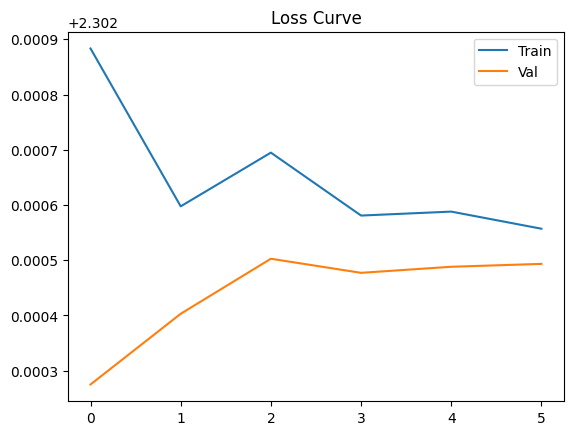

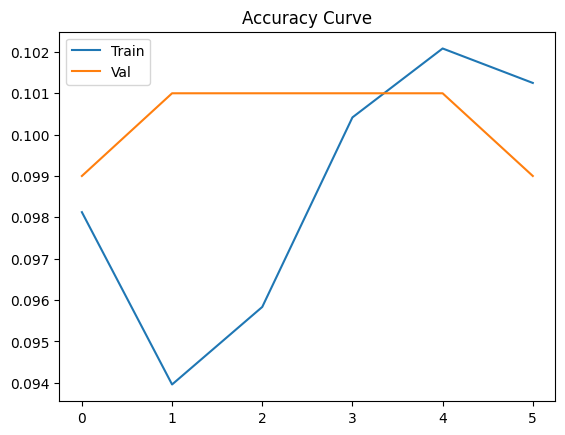


Initializer: Normal
Epoch 1 | Train Acc: 0.1015 | Val Acc: 0.0990
Epoch 2 | Train Acc: 0.1508 | Val Acc: 0.1393
Epoch 3 | Train Acc: 0.3235 | Val Acc: 0.4185
Epoch 4 | Train Acc: 0.4144 | Val Acc: 0.4450
Epoch 5 | Train Acc: 0.4713 | Val Acc: 0.5523
Epoch 6 | Train Acc: 0.5054 | Val Acc: 0.5432
Epoch 7 | Train Acc: 0.5483 | Val Acc: 0.5957
Epoch 8 | Train Acc: 0.6048 | Val Acc: 0.6240
Epoch 9 | Train Acc: 0.6421 | Val Acc: 0.6745
Epoch 10 | Train Acc: 0.6658 | Val Acc: 0.6960
Epoch 11 | Train Acc: 0.6787 | Val Acc: 0.7113
Epoch 12 | Train Acc: 0.6956 | Val Acc: 0.7253
Epoch 13 | Train Acc: 0.7108 | Val Acc: 0.6907
Epoch 14 | Train Acc: 0.7185 | Val Acc: 0.7400
Epoch 15 | Train Acc: 0.7269 | Val Acc: 0.7183
Epoch 16 | Train Acc: 0.7317 | Val Acc: 0.7403
Epoch 17 | Train Acc: 0.7354 | Val Acc: 0.7463
Epoch 18 | Train Acc: 0.7315 | Val Acc: 0.7450
Epoch 19 | Train Acc: 0.7419 | Val Acc: 0.7477
Epoch 20 | Train Acc: 0.7460 | Val Acc: 0.7610
Epoch 21 | Train Acc: 0.7425 | Val Acc: 0.7600
E

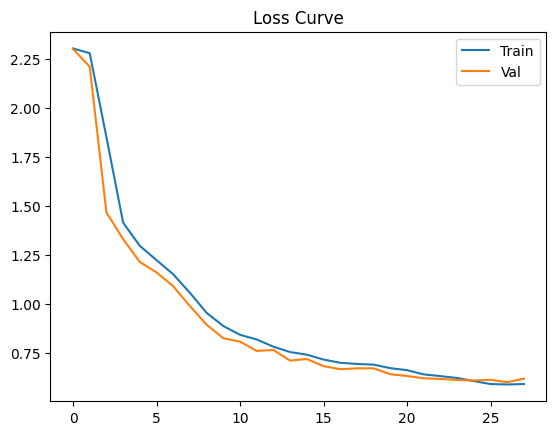

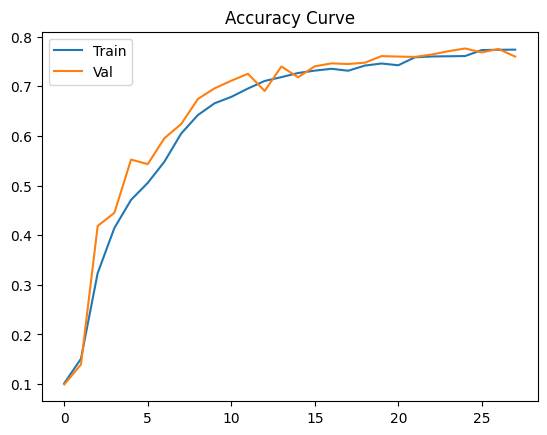


Initializer: HeNormal
Epoch 1 | Train Acc: 0.4669 | Val Acc: 0.6685
Epoch 2 | Train Acc: 0.6635 | Val Acc: 0.7105
Epoch 3 | Train Acc: 0.7108 | Val Acc: 0.7583
Epoch 4 | Train Acc: 0.7298 | Val Acc: 0.7283
Epoch 5 | Train Acc: 0.7385 | Val Acc: 0.7730
Epoch 6 | Train Acc: 0.7533 | Val Acc: 0.7753
Epoch 7 | Train Acc: 0.7673 | Val Acc: 0.7657
Epoch 8 | Train Acc: 0.7712 | Val Acc: 0.7812
Epoch 9 | Train Acc: 0.7785 | Val Acc: 0.7792
Epoch 10 | Train Acc: 0.7794 | Val Acc: 0.7863
Epoch 11 | Train Acc: 0.7812 | Val Acc: 0.7948
Epoch 12 | Train Acc: 0.8002 | Val Acc: 0.8057
Epoch 13 | Train Acc: 0.8010 | Val Acc: 0.8098
Epoch 14 | Train Acc: 0.7977 | Val Acc: 0.8105
Epoch 15 | Train Acc: 0.8075 | Val Acc: 0.8197
Epoch 16 | Train Acc: 0.8046 | Val Acc: 0.8117
Epoch 17 | Train Acc: 0.8123 | Val Acc: 0.8063
Early stopping triggered.

===== RESULTS =====
Epochs to Convergence: 17
Training Time: 81.29 seconds
Final Test Accuracy: 0.815


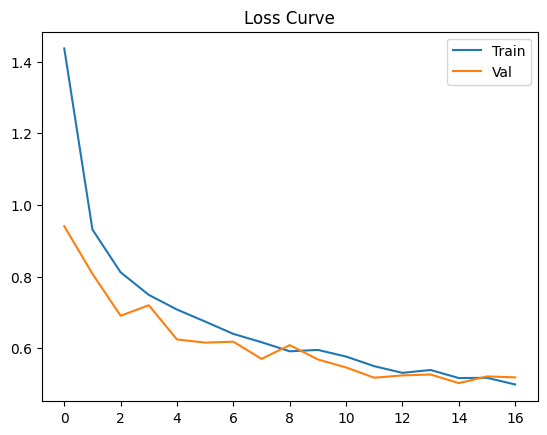

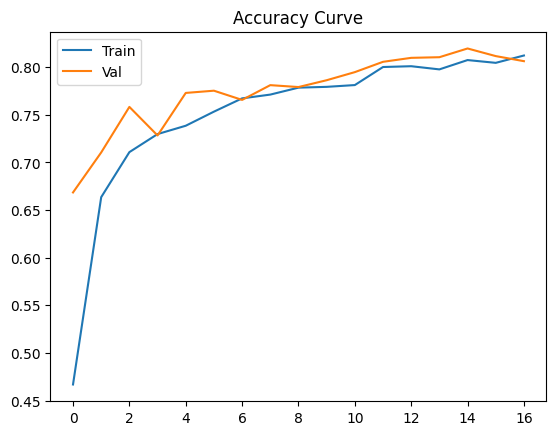


===== DROPOUT RATE: 0.25 =====

Initializer: Uniform
Epoch 1 | Train Acc: 0.0954 | Val Acc: 0.1010
Epoch 2 | Train Acc: 0.0988 | Val Acc: 0.0990
Epoch 3 | Train Acc: 0.0998 | Val Acc: 0.1010
Epoch 4 | Train Acc: 0.0965 | Val Acc: 0.1010
Epoch 5 | Train Acc: 0.0963 | Val Acc: 0.0990
Epoch 6 | Train Acc: 0.1008 | Val Acc: 0.1010
Epoch 7 | Train Acc: 0.0983 | Val Acc: 0.1010
Epoch 8 | Train Acc: 0.0935 | Val Acc: 0.1010
Epoch 9 | Train Acc: 0.1044 | Val Acc: 0.1010
Epoch 10 | Train Acc: 0.1006 | Val Acc: 0.1010
Epoch 11 | Train Acc: 0.1044 | Val Acc: 0.1010
Epoch 12 | Train Acc: 0.1002 | Val Acc: 0.0990
Early stopping triggered.

===== RESULTS =====
Epochs to Convergence: 12
Training Time: 58.89 seconds
Final Test Accuracy: 0.0995


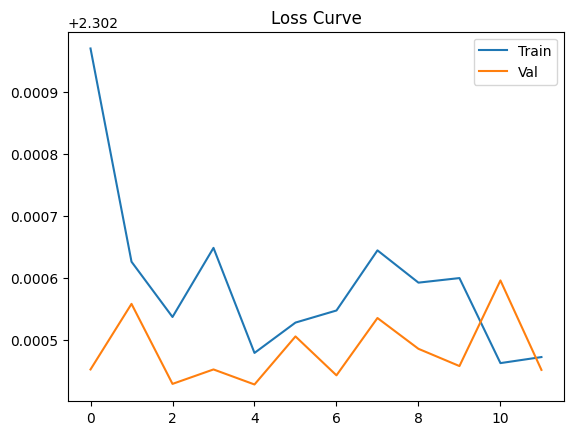

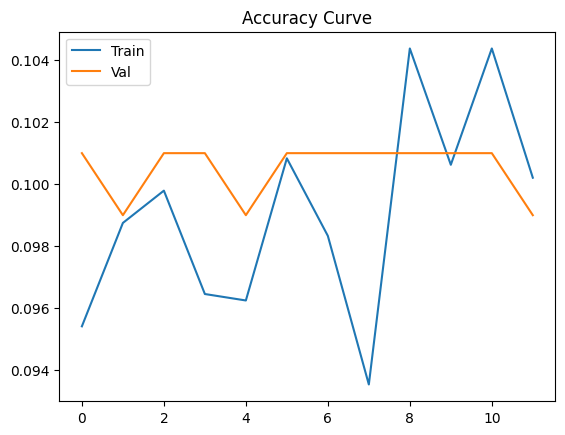


Initializer: Normal
Epoch 1 | Train Acc: 0.1100 | Val Acc: 0.1895
Epoch 2 | Train Acc: 0.1302 | Val Acc: 0.2093
Epoch 3 | Train Acc: 0.2975 | Val Acc: 0.4055
Epoch 4 | Train Acc: 0.3894 | Val Acc: 0.4492
Epoch 5 | Train Acc: 0.4473 | Val Acc: 0.5035
Epoch 6 | Train Acc: 0.4923 | Val Acc: 0.5708
Epoch 7 | Train Acc: 0.5140 | Val Acc: 0.5722
Epoch 8 | Train Acc: 0.5746 | Val Acc: 0.6245
Epoch 9 | Train Acc: 0.6092 | Val Acc: 0.6710
Epoch 10 | Train Acc: 0.6423 | Val Acc: 0.6835
Epoch 11 | Train Acc: 0.6677 | Val Acc: 0.6825
Epoch 12 | Train Acc: 0.6871 | Val Acc: 0.7252
Epoch 13 | Train Acc: 0.6967 | Val Acc: 0.7257
Epoch 14 | Train Acc: 0.7019 | Val Acc: 0.7118
Epoch 15 | Train Acc: 0.7008 | Val Acc: 0.7355
Epoch 16 | Train Acc: 0.7133 | Val Acc: 0.7232
Epoch 17 | Train Acc: 0.7154 | Val Acc: 0.7317
Epoch 18 | Train Acc: 0.7225 | Val Acc: 0.7487
Epoch 19 | Train Acc: 0.7338 | Val Acc: 0.7517
Epoch 20 | Train Acc: 0.7312 | Val Acc: 0.7453
Epoch 21 | Train Acc: 0.7421 | Val Acc: 0.7462
E

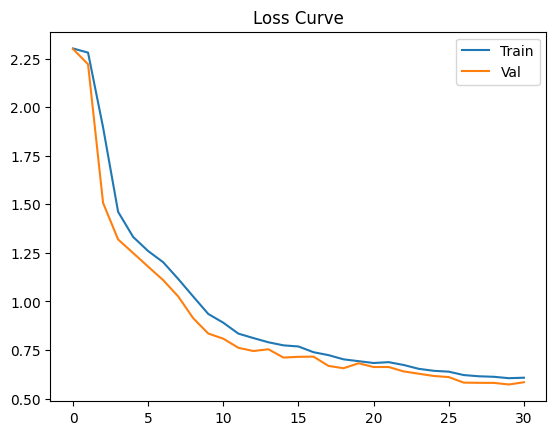

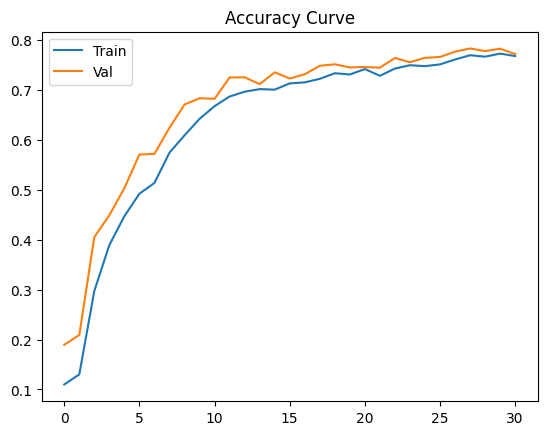


Initializer: HeNormal
Epoch 1 | Train Acc: 0.4275 | Val Acc: 0.6325
Epoch 2 | Train Acc: 0.6221 | Val Acc: 0.7023
Epoch 3 | Train Acc: 0.6685 | Val Acc: 0.7370
Epoch 4 | Train Acc: 0.6981 | Val Acc: 0.7407
Epoch 5 | Train Acc: 0.7185 | Val Acc: 0.7625
Epoch 6 | Train Acc: 0.7215 | Val Acc: 0.7563
Epoch 7 | Train Acc: 0.7269 | Val Acc: 0.7628
Epoch 8 | Train Acc: 0.7404 | Val Acc: 0.7705
Epoch 9 | Train Acc: 0.7456 | Val Acc: 0.7862
Epoch 10 | Train Acc: 0.7590 | Val Acc: 0.7803
Epoch 11 | Train Acc: 0.7585 | Val Acc: 0.7837
Epoch 12 | Train Acc: 0.7671 | Val Acc: 0.7902
Epoch 13 | Train Acc: 0.7706 | Val Acc: 0.7963
Epoch 14 | Train Acc: 0.7825 | Val Acc: 0.8020
Epoch 15 | Train Acc: 0.7777 | Val Acc: 0.8060
Epoch 16 | Train Acc: 0.7865 | Val Acc: 0.8048
Epoch 17 | Train Acc: 0.7875 | Val Acc: 0.8122
Epoch 18 | Train Acc: 0.7913 | Val Acc: 0.7960
Early stopping triggered.

===== RESULTS =====
Epochs to Convergence: 18
Training Time: 83.74 seconds
Final Test Accuracy: 0.81


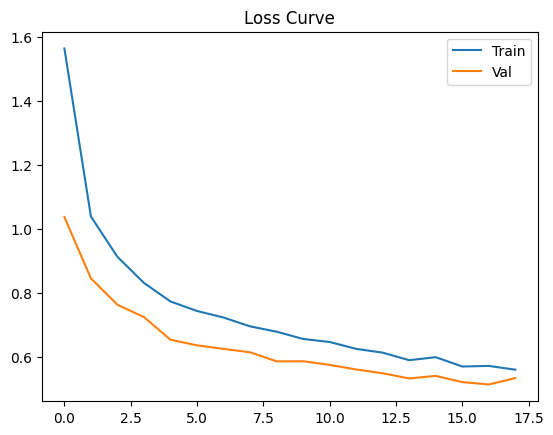

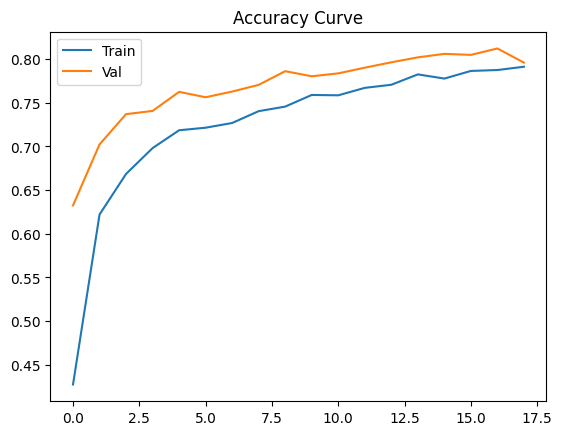


===== DROPOUT RATE: 0.5 =====

Initializer: Uniform
Epoch 1 | Train Acc: 0.0892 | Val Acc: 0.1010
Epoch 2 | Train Acc: 0.1029 | Val Acc: 0.1010
Epoch 3 | Train Acc: 0.0985 | Val Acc: 0.0990
Epoch 4 | Train Acc: 0.1050 | Val Acc: 0.1010
Epoch 5 | Train Acc: 0.0973 | Val Acc: 0.1010
Epoch 6 | Train Acc: 0.1044 | Val Acc: 0.1010
Epoch 7 | Train Acc: 0.1044 | Val Acc: 0.1010
Epoch 8 | Train Acc: 0.1025 | Val Acc: 0.0990
Early stopping triggered.

===== RESULTS =====
Epochs to Convergence: 8
Training Time: 41.19 seconds
Final Test Accuracy: 0.0995


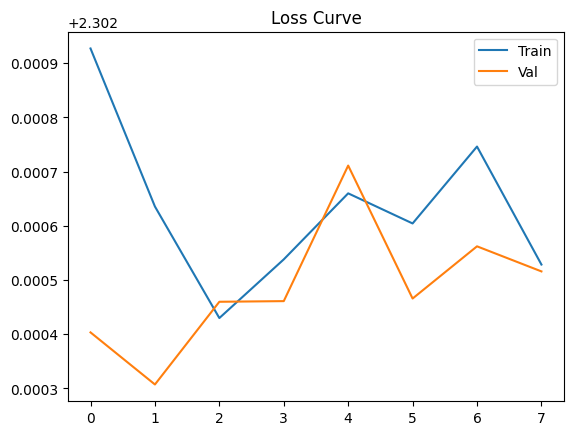

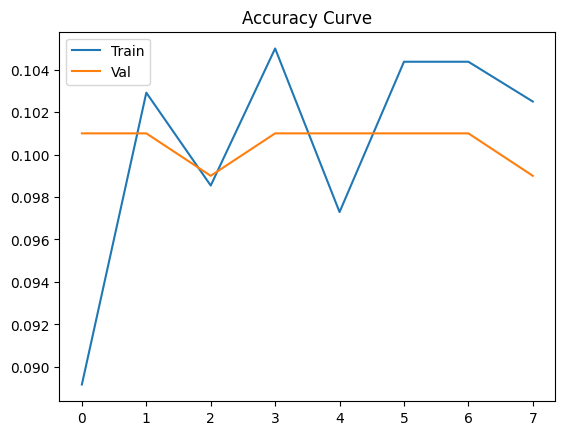


Initializer: Normal
Epoch 1 | Train Acc: 0.1102 | Val Acc: 0.1915
Epoch 2 | Train Acc: 0.1442 | Val Acc: 0.1523
Epoch 3 | Train Acc: 0.2471 | Val Acc: 0.3958
Epoch 4 | Train Acc: 0.3779 | Val Acc: 0.4375
Epoch 5 | Train Acc: 0.4202 | Val Acc: 0.4682
Epoch 6 | Train Acc: 0.4492 | Val Acc: 0.4930
Epoch 7 | Train Acc: 0.4856 | Val Acc: 0.5533
Epoch 8 | Train Acc: 0.5279 | Val Acc: 0.6083
Epoch 9 | Train Acc: 0.5683 | Val Acc: 0.6215
Epoch 10 | Train Acc: 0.6079 | Val Acc: 0.6450
Epoch 11 | Train Acc: 0.6300 | Val Acc: 0.6587
Epoch 12 | Train Acc: 0.6473 | Val Acc: 0.6938
Epoch 13 | Train Acc: 0.6594 | Val Acc: 0.6972
Epoch 14 | Train Acc: 0.6658 | Val Acc: 0.7285
Epoch 15 | Train Acc: 0.6840 | Val Acc: 0.7005
Epoch 16 | Train Acc: 0.6871 | Val Acc: 0.7272
Epoch 17 | Train Acc: 0.6933 | Val Acc: 0.6988
Epoch 18 | Train Acc: 0.6946 | Val Acc: 0.7230
Epoch 19 | Train Acc: 0.7019 | Val Acc: 0.7372
Epoch 20 | Train Acc: 0.7037 | Val Acc: 0.7432
Epoch 21 | Train Acc: 0.7027 | Val Acc: 0.7438
E

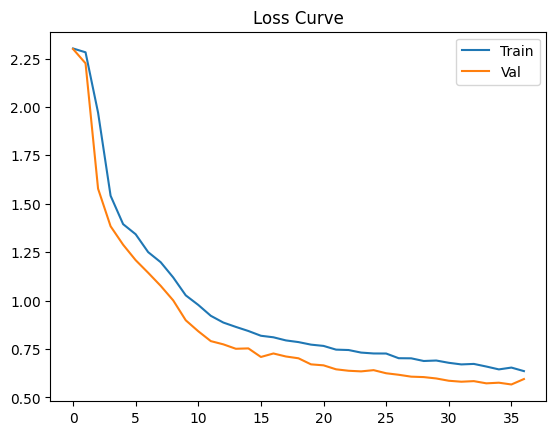

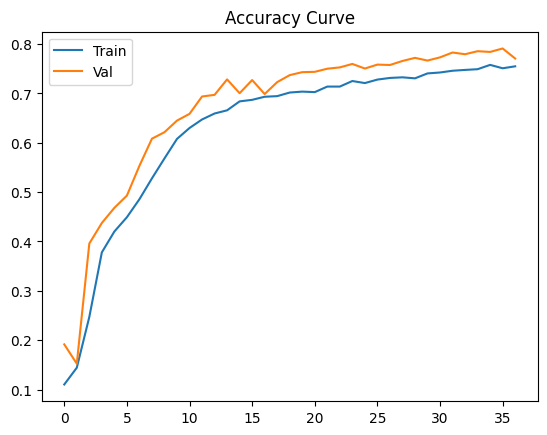


Initializer: HeNormal
Epoch 1 | Train Acc: 0.3133 | Val Acc: 0.5337
Epoch 2 | Train Acc: 0.4873 | Val Acc: 0.6620
Epoch 3 | Train Acc: 0.5619 | Val Acc: 0.6648
Epoch 4 | Train Acc: 0.6106 | Val Acc: 0.6685
Epoch 5 | Train Acc: 0.6210 | Val Acc: 0.7088
Epoch 6 | Train Acc: 0.6515 | Val Acc: 0.7372
Epoch 7 | Train Acc: 0.6544 | Val Acc: 0.7267
Epoch 8 | Train Acc: 0.6646 | Val Acc: 0.7468
Epoch 9 | Train Acc: 0.6885 | Val Acc: 0.7310
Epoch 10 | Train Acc: 0.6815 | Val Acc: 0.7597
Epoch 11 | Train Acc: 0.6942 | Val Acc: 0.7600
Epoch 12 | Train Acc: 0.6969 | Val Acc: 0.7610
Epoch 13 | Train Acc: 0.7054 | Val Acc: 0.7562
Epoch 14 | Train Acc: 0.7150 | Val Acc: 0.7742
Epoch 15 | Train Acc: 0.7133 | Val Acc: 0.7733
Epoch 16 | Train Acc: 0.7235 | Val Acc: 0.7780
Epoch 17 | Train Acc: 0.7225 | Val Acc: 0.7777
Epoch 18 | Train Acc: 0.7231 | Val Acc: 0.7825
Epoch 19 | Train Acc: 0.7306 | Val Acc: 0.7818
Epoch 20 | Train Acc: 0.7292 | Val Acc: 0.7877
Epoch 21 | Train Acc: 0.7381 | Val Acc: 0.7763

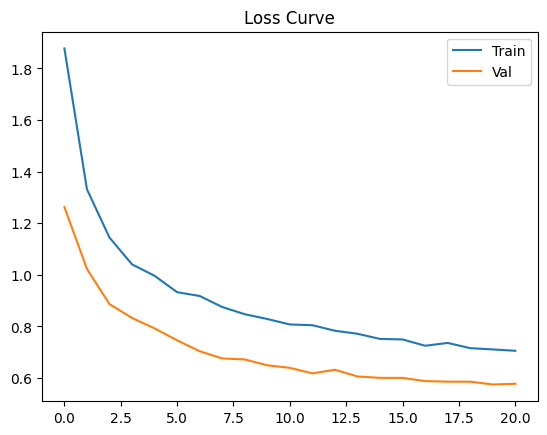

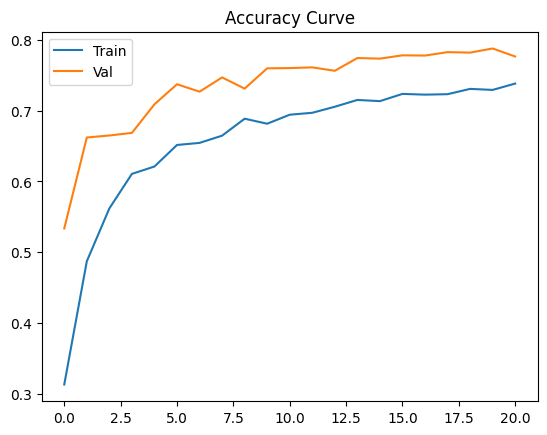

In [ ]:
# ==========================================
# BASELINE TRAINING WITH DROPOUT + EARLY STOPPING
# ==========================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

######################################
#  LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

######################################
#  SPLIT DATA: 80% Train, 10% Test, 10% Val
######################################
indices = np.random.permutation(len(x))
split_train = int(0.8 * len(x))
train_indices = indices[:split_train]
remaining_indices = indices[split_train:]
split_test = int(0.5 * len(remaining_indices))
test_indices = remaining_indices[:split_test]
val_indices = remaining_indices[split_test:]

trainData = x[train_indices]
trainLabels = y[train_indices]
testData = x[test_indices]
testLabels = y[test_indices]
validationData = x[val_indices]
validationLabels = y[val_indices]

######################################
#  10% LABELED BASELINE
######################################
num_labeled = int(0.1 * len(trainData))
x_labeled = trainData[:num_labeled]
y_labeled = trainLabels[:num_labeled]

######################################
#  DATA AUGMENTATION
######################################
batch_size = 64
flip_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical")
])

def preprocess(image):
    image = tf.cast(image, tf.float32) / 255.0
    image = image[..., tf.newaxis]
    return image

def random_noise(image):
    image = preprocess(image)
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05)
    image = image + noise
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image

def augment_flip(image):
    image = preprocess(image)
    image = flip_augmentation(image, training=True)
    return image

######################################
#  DATASET CREATION
######################################
def create_dataset(x_data, y_data, augment_fn):
    dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
    dataset = dataset.map(lambda x, y: (augment_fn(x), tf.cast(y, tf.int64)))
    dataset = dataset.shuffle(10000).batch(batch_size)
    return dataset

train_dataset_flip = create_dataset(x_labeled, y_labeled, augment_flip)
train_dataset_noise = create_dataset(x_labeled, y_labeled, random_noise)

val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
val_dataset = val_dataset.map(
    lambda x, y: (preprocess(x), tf.cast(y, tf.int64))
).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
test_dataset = test_dataset.map(
    lambda x, y: (preprocess(x), tf.cast(y, tf.int64))
).batch(batch_size)

######################################
# FEEDFORWARD NETWORK WITH DROPOUT
######################################
class FeedForwardNN(tf.keras.Model):
    def __init__(self, initializer, dropout_rate=0.0):
        super(FeedForwardNN, self).__init__()

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dense2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
        self.output_layer = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout1(x, training=training)
        x = self.dense2(x)
        x = self.dropout2(x, training=training)
        return self.output_layer(x)

######################################
# INITIALIZERS
######################################
initializer_uniform = tf.keras.initializers.RandomUniform(minval=-1/784, maxval=1/784)
initializer_normal = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
initializer_he = tf.keras.initializers.HeNormal()

initializers = {
    "Uniform": initializer_uniform,
    "Normal": initializer_normal,
    "HeNormal": initializer_he
}

######################################
#  TRAINING PARAMETERS
######################################
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
learning_rate = 0.01
momentum = 0.9
epochs = 50
patience = 5

######################################
#  TRAIN FUNCTION WITH EARLY STOP
######################################
def train_and_evaluate(model, train_dataset):

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    train_losses, val_losses, train_accs, val_accs, val_errors = [], [], [], [], []

    start_time = time.time()
    converged_epoch = epochs

    for epoch in range(epochs):
        # TRAIN
        total_loss, total_correct, total_samples = 0, 0, 0
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                preds = model(images, training=True)
                loss = loss_fn(labels, preds)
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            total_loss += loss.numpy()
            predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
            total_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            total_samples += labels.shape[0]

        train_acc = total_correct / total_samples
        train_loss = total_loss / len(train_dataset)

        # VALIDATION
        val_correct, val_total, val_loss_total = 0, 0, 0
        for images, labels in val_dataset:
            preds = model(images, training=False)
            loss = loss_fn(labels, preds)
            val_loss_total += loss.numpy()
            predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
            val_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            val_total += labels.shape[0]

        val_acc = val_correct / val_total
        val_loss = val_loss_total / len(val_dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

        # EARLY STOPPING
        val_error = 1 - val_acc
        val_errors.append(val_error)
        if len(val_errors) > patience:
            recent = val_errors[-patience:]
            EV = np.mean(recent)
            sigma_EV = np.std(recent)
            if val_error > EV + sigma_EV:
                print("Early stopping triggered.")
                converged_epoch = epoch + 1
                break

    training_time = time.time() - start_time

    # TEST
    test_correct, test_total = 0, 0
    for images, labels in test_dataset:
        preds = model(images, training=False)
        predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
        test_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
        test_total += labels.shape[0]

    test_acc = test_correct / test_total

    print("\n===== RESULTS =====")
    print("Epochs to Convergence:", converged_epoch)
    print("Training Time:", round(training_time, 2), "seconds")
    print("Final Test Accuracy:", test_acc)

    # PLOTS
    plt.figure()
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title("Loss Curve")
    plt.legend(["Train", "Val"])
    plt.show()

    plt.figure()
    plt.plot(train_accs)
    plt.plot(val_accs)
    plt.title("Accuracy Curve")
    plt.legend(["Train", "Val"])
    plt.show()

######################################
# RUN EXPERIMENTS WITH DROPOUT
######################################
dropout_rates = [0.1, 0.25, 0.5]

for dropout_rate in dropout_rates:
    print(f"\n===== DROPOUT RATE: {dropout_rate} =====")
    for name, init in initializers.items():
        print(f"\nInitializer: {name}")
        model = FeedForwardNN(init, dropout_rate=dropout_rate)
        train_and_evaluate(model, train_dataset_flip)  # or train_dataset_noise


# IMPLEMENT NETWORK PRUNNING

In [ ]:
# ==========================================
# NETWORK PRUNING WITHOUT DROPOUT
# ==========================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

######################################
#  LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

######################################
#  SPLIT DATA: 80% Train, 10% Test, 10% Val
######################################
indices = np.random.permutation(len(x))

split_train = int(0.8 * len(x))
train_indices = indices[:split_train]
remaining_indices = indices[split_train:]

split_test = int(0.5 * len(remaining_indices))
test_indices = remaining_indices[:split_test]
val_indices = remaining_indices[split_test:]

trainData = x[train_indices]
trainLabels = y[train_indices]

testData = x[test_indices]
testLabels = y[test_indices]

validationData = x[val_indices]
validationLabels = y[val_indices]

######################################
#  10% LABELED BASELINE
######################################
num_labeled = int(0.1 * len(trainData))
x_labeled = trainData[:num_labeled]
y_labeled = trainLabels[:num_labeled]

######################################
#  DATA AUGMENTATION (flip or noise)
######################################
batch_size = 64

flip_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical")
])

def preprocess(image):
    image = tf.cast(image, tf.float32) / 255.0
    image = image[..., tf.newaxis]
    return image

def random_noise(image):
    image = preprocess(image)
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05)
    image = image + noise
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image

def augment_flip(image):
    image = preprocess(image)
    image = flip_augmentation(image, training=True)
    return image

######################################
#  DATASET CREATION
######################################
def create_dataset(x_data, y_data, augment_fn):
    dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
    dataset = dataset.map(lambda x, y: (augment_fn(x), tf.cast(y, tf.int64)))
    dataset = dataset.shuffle(10000).batch(batch_size)
    return dataset

train_dataset_flip = create_dataset(x_labeled, y_labeled, augment_flip)
train_dataset_noise = create_dataset(x_labeled, y_labeled, random_noise)

val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
val_dataset = val_dataset.map(lambda x, y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
test_dataset = test_dataset.map(lambda x, y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

######################################
#  LARGER FEEDFORWARD NETWORK FOR PRUNING
######################################
class LargeFeedForwardNN(tf.keras.Model):
    def __init__(self, initializer):
        super(LargeFeedForwardNN, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation='relu', kernel_initializer=initializer)
        self.dense2 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
        self.output_layer = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)

######################################
#  INITIALIZERS
######################################
initializer_uniform = tf.keras.initializers.RandomUniform(minval=-1/784, maxval=1/784)
initializer_normal = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
initializer_he = tf.keras.initializers.HeNormal()

initializers = {
    "Uniform": initializer_uniform,
    "Normal": initializer_normal,
    "HeNormal": initializer_he
}

######################################
#  TRAINING PARAMETERS
######################################
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
learning_rate = 0.01
momentum = 0.9
epochs = 50
patience = 5

######################################
# 9️⃣ TRAIN FUNCTION WITH EARLY STOP
######################################
def train_and_evaluate(model, train_dataset):
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    val_errors = []

    start_time = time.time()
    converged_epoch = epochs

    for epoch in range(epochs):
        # TRAIN
        total_loss, total_correct, total_samples = 0, 0, 0
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                preds = model(images, training=True)
                loss = loss_fn(labels, preds)
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            total_loss += loss.numpy()
            predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
            total_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            total_samples += labels.shape[0]

        train_acc = total_correct / total_samples
        train_loss = total_loss / len(train_dataset)

        # VALIDATION
        val_correct, val_total, val_loss_total = 0, 0, 0
        for images, labels in val_dataset:
            preds = model(images, training=False)
            loss = loss_fn(labels, preds)
            val_loss_total += loss.numpy()
            predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
            val_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            val_total += labels.shape[0]

        val_acc = val_correct / val_total
        val_loss = val_loss_total / len(val_dataset)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

        # EARLY STOPPING
        val_error = 1 - val_acc
        val_errors.append(val_error)
        if len(val_errors) > patience:
            recent = val_errors[-patience:]
            EV = np.mean(recent)
            sigma_EV = np.std(recent)
            if val_error > EV + sigma_EV:
                print("Early stopping triggered.")
                converged_epoch = epoch + 1
                break

    training_time = time.time() - start_time

    # TEST
    test_correct, test_total = 0, 0
    for images, labels in test_dataset:
        preds = model(images, training=False)
        predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
        test_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
        test_total += labels.shape[0]

    test_acc = test_correct / test_total
    print("\n===== RESULTS =====")
    print("Epochs to Convergence:", converged_epoch)
    print("Training Time:", round(training_time,2), "seconds")
    print("Final Test Accuracy:", test_acc)

######################################
#  MAGNITUDE-BASED PRUNING FUNCTION
######################################
def magnitude_prune(model, pruning_rate):
    for layer in [model.dense1, model.dense2]:
        if isinstance(layer, tf.keras.layers.Dense):
            weights, biases = layer.get_weights()
            flat_weights = np.abs(weights.flatten())
            threshold = np.percentile(flat_weights, pruning_rate*100)
            mask = np.abs(weights) >= threshold
            pruned_weights = weights * mask
            layer.set_weights([pruned_weights, biases])
    print(f"Pruned {pruning_rate*100}% of weights in hidden layers.")

######################################
#  RUN PRUNING EXPERIMENTS
######################################
pruning_rates = [0.1, 0.25, 0.5]

for pruning_rate in pruning_rates:
    print(f"\n===== PRUNING RATE: {int(pruning_rate*100)}% =====")
    for name, init in initializers.items():
        print(f"\nInitializer: {name}")

        # Step 1: Train large network
        model = LargeFeedForwardNN(init)
        train_and_evaluate(model, train_dataset_flip)

        # Step 2: Prune weights
        magnitude_prune(model, pruning_rate)

        # Step 3: Fine-tune after pruning
        print("Fine-tuning after pruning...")
        train_and_evaluate(model, train_dataset_flip)



===== PRUNING RATE: 10% =====

Initializer: Uniform
Epoch 1 | Train Acc: 0.1060 | Val Acc: 0.0910
Epoch 2 | Train Acc: 0.1002 | Val Acc: 0.0910
Epoch 3 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 4 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 5 | Train Acc: 0.1079 | Val Acc: 0.0910
Epoch 6 | Train Acc: 0.1042 | Val Acc: 0.0910
Epoch 7 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 8 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 9 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 10 | Train Acc: 0.1054 | Val Acc: 0.0910
Epoch 11 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 12 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 13 | Train Acc: 0.1060 | Val Acc: 0.0910
Epoch 14 | Train Acc: 0.1098 | Val Acc: 0.0910
Epoch 15 | Train Acc: 0.1206 | Val Acc: 0.0983
Epoch 16 | Train Acc: 0.1310 | Val Acc: 0.1082
Epoch 17 | Train Acc: 0.1704 | Val Acc: 0.2448
Epoch 18 | Train Acc: 0.3275 | Val Acc: 0.3730
Epoch 19 | Train Acc: 0.3925 | Val Acc: 0.4020
Epoch 20 | Train Acc: 0.4467 | Val Acc: 0.4113
Epoch 21 | Train

# Implement Label + neural Network

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time

# ==========================================
#  SEED CONTROL
# ==========================================
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)

# ==========================================
#  LOAD DATA
# ==========================================
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

# Reduce dataset for RAM efficiency; adjust if enough RAM
x = x[:2000].astype(np.float32)
y = y[:2000]

# ==========================================
#  TRAIN/VAL/TEST SPLIT
# ==========================================
indices = np.random.permutation(len(x))
split_train = int(0.8 * len(x))
train_idx = indices[:split_train]
remaining = indices[split_train:]
split_test = int(0.5 * len(remaining))
test_idx = remaining[:split_test]
val_idx = remaining[split_test:]

trainData = x[train_idx]
trainLabels = y[train_idx]
testData = x[test_idx]
testLabels = y[test_idx]
validationData = x[val_idx]
validationLabels = y[val_idx]

# ==========================================
#  SEMI-SUPERVISED SPLIT
# ==========================================
num_labeled = int(0.1 * len(trainData))
x_labeled = trainData[:num_labeled]
y_labeled = trainLabels[:num_labeled]
x_unlabeled = trainData[num_labeled:]

# ==========================================
# 5️⃣ PREPROCESS FUNCTION
# ==========================================
def preprocess(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

batch_size = 32  # smaller batch for RAM efficiency

def create_dataset(x_data, y_data):
    ds = tf.data.Dataset.from_tensor_slices((x_data, y_data))
    ds = ds.map(lambda x, y: (preprocess(x), tf.cast(y, tf.int64)))
    ds = ds.shuffle(1000).batch(batch_size)
    return ds

# Datasets
train_dataset_labeled = create_dataset(x_labeled, y_labeled)
val_dataset = create_dataset(validationData, validationLabels)
test_dataset = create_dataset(testData, testLabels)

# ==========================================
#  NEURAL NETWORK MODEL
# ==========================================
class SemiSupervisedNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal')
        self.d2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal')
        self.out = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        return self.out(x)

# ==========================================
#  EARLY STOPPING
# ==========================================
def early_stop_check(val_errors, patience):
    if len(val_errors) > patience:
        recent = val_errors[-patience:]
        EV = np.mean(recent)
        sigma = np.std(recent)
        if val_errors[-1] > EV + sigma:
            return True
    return False

# ==========================================
#  TRAIN FUNCTION
# ==========================================
def train_model(model, train_dataset, val_dataset, lr=0.01, momentum=0.9, epochs=50, patience=5):
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    val_errors = []
    start_time = time.time()

    for epoch in range(epochs):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                preds = model(images)
                loss = loss_fn(labels, preds)
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Validation
        val_correct, total = 0, 0
        for images, labels in val_dataset:
            preds = model(images)
            predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
            val_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            total += labels.shape[0]

        val_acc = val_correct / total
        val_errors.append(1 - val_acc)
        print(f"Epoch {epoch+1} | Val Acc {val_acc:.4f}")

        if early_stop_check(val_errors, patience):
            print("Early stopping triggered.")
            break

    training_time = time.time() - start_time
    return training_time

# ==========================================
#  MEMORY-EFFICIENT LABEL PROPAGATION
# ==========================================
def label_propagation(x_labeled, y_labeled, x_unlabeled, num_classes=10, sigma=1.0, iterations=5, batch_size_lp=256):
    """
    Computes pseudo-labels for unlabeled data using batch-wise label propagation.
    """
    x_labeled_flat = x_labeled.reshape(len(x_labeled), -1) / 255.0
    x_unlabeled_flat = x_unlabeled.reshape(len(x_unlabeled), -1) / 255.0

    X_all = np.vstack([x_labeled_flat, x_unlabeled_flat]).astype(np.float32)
    M, N = len(x_labeled), len(x_unlabeled)

    Y = np.zeros((M+N, num_classes), dtype=np.float32)
    for i, label in enumerate(y_labeled):
        Y[i, label] = 1.0

    for _ in range(iterations):
        Y_new = np.zeros_like(Y)
        for start in range(0, M+N, batch_size_lp):
            end = min(start + batch_size_lp, M+N)
            batch = X_all[start:end]
            dists = np.linalg.norm(batch[:,None,:] - X_all[None,:,:], axis=2)
            W = np.exp(-(dists**2)/(2*sigma**2))
            T = W / (W.sum(axis=0, keepdims=True) + 1e-8)
            Y_new[start:end] = T @ Y
        Y = Y_new
        Y = Y / (Y.sum(axis=1, keepdims=True) + 1e-8)
        # Clamp labeled data
        for i, label in enumerate(y_labeled):
            Y[i] = 0
            Y[i, label] = 1.0

    return Y[M:]

# ==========================================
#  RUN SEMI-SUPERVISED EXPERIMENT
# ==========================================
set_seed(123)

#  Train baseline NN on labeled data
model = SemiSupervisedNN()
train_model(model, train_dataset_labeled, val_dataset)

#  Compute pseudo-labels for unlabeled data
pseudo_labels = label_propagation(x_labeled, y_labeled, x_unlabeled)
pseudo_label_indices = np.argmax(pseudo_labels, axis=1)

# Combine labeled + pseudo-labeled data
x_combined = np.vstack([x_labeled, x_unlabeled])
y_combined = np.concatenate([y_labeled, pseudo_label_indices])
train_dataset_combined = create_dataset(x_combined, y_combined)


model_combined = SemiSupervisedNN()
training_time = train_model(model_combined, train_dataset_combined, val_dataset)

#  Evaluate on test set
test_correct, test_total = 0, 0
for images, labels in create_dataset(testData, testLabels):
    preds = model_combined(images)
    predictions = tf.argmax(preds, axis=1, output_type=tf.int64)
    test_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
    test_total += labels.shape[0]

test_acc = test_correct / test_total
print("\n===== FINAL RESULTS =====")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Training Time (seconds): {training_time:.2f}")

# SAVE RESULTS
df_results = pd.DataFrame({
    "TestAccuracy": [test_acc],
    "TrainingTimeSeconds": [training_time]
})
df_results.to_csv("semi_supervised_results.csv", index=False)
print("\nResults saved to semi_supervised_results.csv")



Epoch 1 | Val Acc 0.3050
Epoch 2 | Val Acc 0.4100
Epoch 3 | Val Acc 0.5200
Epoch 4 | Val Acc 0.5050
Epoch 5 | Val Acc 0.5550
Epoch 6 | Val Acc 0.5700
Epoch 7 | Val Acc 0.5950
Epoch 8 | Val Acc 0.6100
Epoch 9 | Val Acc 0.5900
Epoch 10 | Val Acc 0.6250
Epoch 11 | Val Acc 0.6750
Epoch 12 | Val Acc 0.6200
Epoch 13 | Val Acc 0.6350
Epoch 14 | Val Acc 0.6650
Epoch 15 | Val Acc 0.6850
Epoch 16 | Val Acc 0.6550
Epoch 17 | Val Acc 0.6900
Epoch 18 | Val Acc 0.6850
Epoch 19 | Val Acc 0.6850
Epoch 20 | Val Acc 0.7150
Epoch 21 | Val Acc 0.6650
Early stopping triggered.
Epoch 1 | Val Acc 0.6550
Epoch 2 | Val Acc 0.6800
Epoch 3 | Val Acc 0.6750
Epoch 4 | Val Acc 0.7100
Epoch 5 | Val Acc 0.7000
Epoch 6 | Val Acc 0.7200
Epoch 7 | Val Acc 0.6950
Epoch 8 | Val Acc 0.7350
Epoch 9 | Val Acc 0.7300
Epoch 10 | Val Acc 0.6950
Early stopping triggered.

===== FINAL RESULTS =====
Test Accuracy: 0.6900
Training Time (seconds): 15.63

Results saved to semi_supervised_results.csv


# Implement 100% LABELED

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from collections import deque
import time

######################################
# SEEDS FOR PART (f)
######################################
seeds = [1, 123, 12345]

######################################
# LOAD DATASET
######################################
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), _ = fashion_mnist.load_data()

######################################
# FIXED BASELINE CONFIGURATION
######################################
initializer = tf.keras.initializers.HeNormal()
learning_rate = 0.1
momentum = 0.9
batch_size = 64
epochs = 50
moving_window = 5

######################################
# PREPROCESSING (MinMax for baseline)
######################################
def preprocess(image):
    image = tf.cast(image, tf.float32) / 255.0
    return image[..., tf.newaxis]

######################################
# MODEL DEFINITION
######################################
def create_model():
    class FeedForwardNN(tf.keras.Model):
        def __init__(self):
            super().__init__()
            self.flatten = tf.keras.layers.Flatten()
            self.d1 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer)
            self.d2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer)
            self.out = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)

        def call(self, x):
            x = self.flatten(x)
            x = self.d1(x)
            x = self.d2(x)
            return self.out(x)

    return FeedForwardNN()

######################################
# RESULTS STORAGE
######################################
baseline_results = []

######################################
# RUN BASELINE FOR EACH SEED
######################################
for seed in seeds:
    print(f"\n===== RUNNING SEED {seed} =====")

    tf.random.set_seed(seed)
    np.random.seed(seed)

    # Shuffle data
    indices = np.random.permutation(len(x))
    split_train = int(0.8 * len(x))
    train_indices = indices[:split_train]
    remaining_indices = indices[split_train:]

    split_test = int(0.5 * len(remaining_indices))
    test_indices = remaining_indices[:split_test]
    val_indices = remaining_indices[split_test:]

    trainData, trainLabels = x[train_indices], y[train_indices]
    testData, testLabels = x[test_indices], y[test_indices]
    validationData, validationLabels = x[val_indices], y[val_indices]

    #  PART (e): Use ONLY 100% labeled
    num_labeled = int(1 * len(trainData))
    x_labeled = trainData[:num_labeled]
    y_labeled = trainLabels[:num_labeled]

    # Datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((x_labeled, y_labeled))
    train_dataset = train_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).shuffle(10000).batch(batch_size)

    val_dataset = tf.data.Dataset.from_tensor_slices((validationData, validationLabels))
    val_dataset = val_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

    test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabels))
    test_dataset = test_dataset.map(lambda x,y: (preprocess(x), tf.cast(y, tf.int64))).batch(batch_size)

    model = create_model()
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

    val_errors = deque(maxlen=moving_window)

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    start_time = time.time()

    ######################################
    # TRAINING LOOP WITH EARLY STOPPING
    ######################################
    for epoch in range(epochs):

        # Training
        train_correct = 0
        train_total = 0
        train_loss_total = 0

        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                preds = model(images)
                loss = loss_fn(labels, preds)
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            train_loss_total += loss.numpy() * images.shape[0]
            predictions = tf.argmax(preds, axis=1)
            train_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            train_total += labels.shape[0]

        train_loss = train_loss_total / train_total
        train_acc = train_correct / train_total

        # Validation
        val_correct = 0
        val_total = 0
        val_loss_total = 0

        for images, labels in val_dataset:
            preds = model(images)
            loss = loss_fn(labels, preds)
            val_loss_total += loss.numpy() * images.shape[0]
            predictions = tf.argmax(preds, axis=1)
            val_correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
            val_total += labels.shape[0]

        val_loss = val_loss_total / val_total
        val_acc = val_correct / val_total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        val_errors.append(val_loss)

        print(f"Epoch {epoch+1} | Train Loss {train_loss:.4f} | Val Loss {val_loss:.4f}")

        # Early stopping (Part d reused here)
        if len(val_errors) == moving_window:
            EV = np.mean(val_errors)
            sigma_EV = np.std(val_errors)
            if val_loss > EV + sigma_EV:
                print(f"Early stopping at epoch {epoch+1}")
                break

    epochs_to_convergence = epoch + 1
    training_time = time.time() - start_time

    ######################################
    # TEST EVALUATION
    ######################################
    correct = 0
    total = 0

    for images, labels in test_dataset:
        preds = model(images)
        predictions = tf.argmax(preds, axis=1)
        correct += tf.reduce_sum(tf.cast(predictions == labels, tf.int32)).numpy()
        total += labels.shape[0]

    test_acc = correct / total

    print(f"Final Test Accuracy (Seed {seed}): {test_acc:.4f}")
    print(f"Epochs to Convergence: {epochs_to_convergence}")

    baseline_results.append({
        "Seed": seed,
        "TestAccuracy": test_acc,
        "EpochsToConvergence": epochs_to_convergence,
        "TrainingTimeSeconds": training_time
    })

######################################
# SAVE RESULTS
######################################
df = pd.DataFrame(baseline_results)
df.to_csv("100%LABELED_results.csv", index=False)

print("\n=== BASELINE RESULTS ===")
print(df)
print("\nMean Accuracy:", df["TestAccuracy"].mean())
print("Std Accuracy:", df["TestAccuracy"].std())


===== RUNNING SEED 1 =====
Epoch 1 | Train Loss 0.6136 | Val Loss 0.4957
Epoch 2 | Train Loss 0.4650 | Val Loss 0.4590
Epoch 3 | Train Loss 0.4309 | Val Loss 0.4470
Epoch 4 | Train Loss 0.4081 | Val Loss 0.4413
Epoch 5 | Train Loss 0.4025 | Val Loss 0.4215
Epoch 6 | Train Loss 0.3942 | Val Loss 0.4200
Epoch 7 | Train Loss 0.3802 | Val Loss 0.4188
Epoch 8 | Train Loss 0.3667 | Val Loss 0.4122
Epoch 9 | Train Loss 0.3736 | Val Loss 0.4147
Epoch 10 | Train Loss 0.3592 | Val Loss 0.3958
Epoch 11 | Train Loss 0.3519 | Val Loss 0.4407
Early stopping at epoch 11
Final Test Accuracy (Seed 1): 0.8600
Epochs to Convergence: 11

===== RUNNING SEED 123 =====
Epoch 1 | Train Loss 0.6177 | Val Loss 0.5057
Epoch 2 | Train Loss 0.4869 | Val Loss 0.5202
Epoch 3 | Train Loss 0.4402 | Val Loss 0.4182
Epoch 4 | Train Loss 0.4258 | Val Loss 0.4337
Epoch 5 | Train Loss 0.3966 | Val Loss 0.4522
Epoch 6 | Train Loss 0.3918 | Val Loss 0.3981
Epoch 7 | Train Loss 0.3773 | Val Loss 0.4216
Epoch 8 | Train Loss 0